In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Data Split

In [27]:
dataset_game= pd.read_csv("vgsales.csv")
dataset_game.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [28]:
print(len(dataset_game))#mengcek banyak record

16600


In [29]:
#training data secara manual 
data_train = dataset_game [['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']][:70] 
label_train = dataset_game ['Genre'][:70]

#testing data secara manual
data_test = dataset_game [['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']][:-30] 
label_test = dataset_game ['Genre'][:-30]

In [30]:
#untuk memeriksa panjang data yang di pisahkan
print(f'data train len: {len(data_train)}',
      f'label train len : {len(label_train)}',
      f'data test len : {len(data_test)}',
     f'label test len : {len(label_test)}',
      f'dataset len : {len(dataset_game)}',
      sep='\n')

data train len: 70
label train len : 70
data test len : 16570
label test len : 16570
dataset len : 16600


## Data Transformasi

In [31]:
from sklearn.preprocessing import StandardScaler    
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns    

### Normalisasi

In [32]:
dataset_normal = dataset_game.copy() # untuk membuat data normalisasi

In [33]:
scaler = MinMaxScaler() #printah untuk membangun data normalisasi

In [34]:
normal = scaler.fit_transform(dataset_normal[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']])#untuk skala data
normal = pd.DataFrame(normal) #untuk normalisasi data
normal.rename(columns={0:'NA_Sales',1:'EU_Sales',2:'JP_Sales',3:'Other_Sales',4:'Global_Sales'}, inplace=True)# untuk menganti nama label

In [35]:
normal

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.000000,1.000000,0.368885,0.800378,1.000000
1,0.700892,0.123363,0.666341,0.072848,0.486281
2,0.382020,0.443832,0.370841,0.313150,0.432854
3,0.379610,0.379394,0.320939,0.280038,0.398767
4,0.271632,0.306340,1.000000,0.094607,0.379064
...,...,...,...,...,...
16595,0.000000,0.000000,0.000000,0.000000,0.000000
16596,0.000000,0.000345,0.000000,0.000000,0.000000
16597,0.000241,0.000000,0.000000,0.000000,0.000000
16598,1.000000,1.000000,0.368885,0.800378,1.000000


Text(0, 0.5, 'Penjualan gelobal')

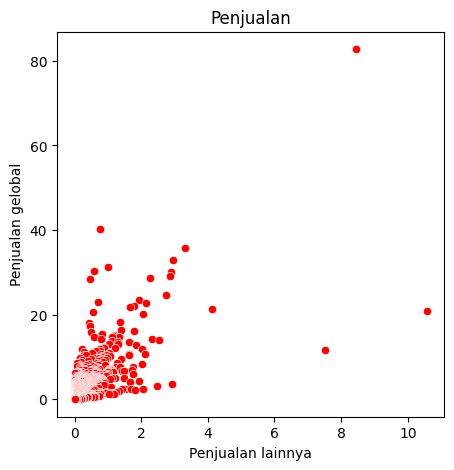

In [36]:
#Visualisasi Data Sebelum normalisasi
plt.figure(1, figsize=(5,5))
sns.scatterplot(dataset_normal, x='Other_Sales', y='Global_Sales', color='red')
plt.title('Penjualan')
plt.xlabel('Penjualan lainnya')
plt.ylabel('Penjualan gelobal')

Text(0, 0.5, 'Penjualan gelobal')

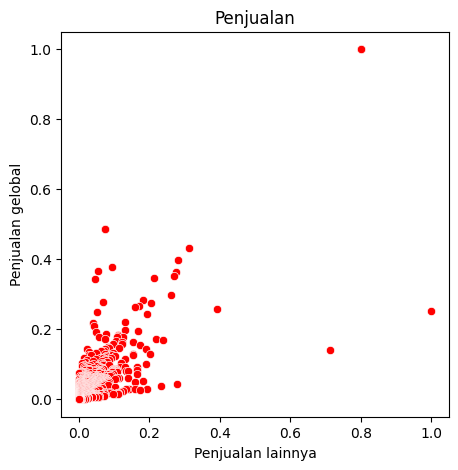

In [37]:
#Visualisasi Data Sesudah normalisasi
plt.figure(1, figsize=(5,5))
sns.scatterplot(normal, x='Other_Sales', y='Global_Sales', color='red')
plt.title('Penjualan')
plt.xlabel('Penjualan lainnya')
plt.ylabel('Penjualan gelobal')

### Standarisasi

In [38]:
dataset_standar = dataset_game.copy() 

In [39]:
standar = StandardScaler()

In [40]:

# standarisasi process
scaled_data = standar.fit_transform(dataset_game[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']])

In [41]:
np.std(dataset_game)

C:\Users\MID\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Rank            4792.286677
Year               5.830853
NA_Sales           0.905115
EU_Sales           0.553409
JP_Sales           0.314952
Other_Sales        0.199632
Global_Sales       1.708696
dtype: float64

In [42]:
np.std(scaled_data)

1.0

In [43]:
data_standar = pd.DataFrame(scaled_data)

In [44]:
data_standar

,0,1,2,3,4
0,45.542394,52.170131,11.721134,42.134456,48.104058
1,31.831432,6.200485,21.373409,3.613582,23.231291
2,17.214509,23.005426,11.784635,16.336992,20.644523
3,17.104025,19.626368,10.165339,14.583766,18.994142
4,12.154379,15.795564,32.200467,4.765702,18.040198
...,...,...,...,...,...
16595,-0.297075,-0.268514,-0.248958,-0.243514,-0.312978
16596,-0.297075,-0.250445,-0.248958,-0.243514,-0.312978
16597,-0.286026,-0.268514,-0.248958,-0.243514,-0.312978
16598,45.542394,52.170131,11.721134,42.134456,48.104058


## Data Cleaning

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
dataset_clean = dataset_game.copy()

In [47]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16600 entries, 0 to 16599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16600 non-null  int64  
 1   Name          16600 non-null  object 
 2   Platform      16600 non-null  object 
 3   Year          16329 non-null  float64
 4   Genre         16600 non-null  object 
 5   Publisher     16542 non-null  object 
 6   NA_Sales      16600 non-null  float64
 7   EU_Sales      16600 non-null  float64
 8   JP_Sales      16600 non-null  float64
 9   Other_Sales   16600 non-null  float64
 10  Global_Sales  16600 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [48]:
dataset_clean.isna().sum() #Mengecek data yang kosong

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### Subtitusi

In [49]:
imputer_mean= SimpleImputer (strategy='mean')
imputer_median= SimpleImputer (strategy='median')
imputer_modus= SimpleImputer (strategy='most_frequent')

In [50]:
#menghapus data yang kosong
dataset_clean['Year'] = imputer_mean.fit_transform(dataset_clean[['Year']]) 
dataset_clean['Publisher'] = imputer_modus.fit_transform(dataset_clean[['Publisher']])

In [51]:
dataset_clean.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [52]:
dataset_clean.tail(20)#mengecek data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16580,16583,Real Rode,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16581,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01
16582,16585,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01
16583,16586,Carmageddon 64,N64,1999.0,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01
16584,16587,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01
16585,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01
16586,16589,Secret Files 2: Puritas Cordis,DS,2009.0,Adventure,Deep Silver,0.00,0.01,0.00,0.00,0.01
16587,16590,Mezase!! Tsuri Master DS,DS,2009.0,Sports,Hudson Soft,0.00,0.00,0.01,0.00,0.01
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.00,0.01


In [54]:
dataset_clean.duplicated().sum()#mengecek data yang duplikat

2

In [55]:
#cara duplikat data yang ada 
dataset_clean.drop_duplicates(inplace=True)
dataset_clean.duplicated().sum()

0

##  Encoding

In [63]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [82]:
dataset_or = dataset_game.copy()
dataset_onhot = dataset_game.copy()

In [66]:
dataset_ordinal.dtypes#menecek type data

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

### Ordinal

In [65]:
ordinal = OrdinalEncoder()

In [83]:
dataset_or['Global_Sales'] = ordinal.fit_transform(dataset_ordinal[['Global_Sales']]).astype('int32')#mengubah type data atau mengubah fromat data

In [84]:
dataset_or.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,620
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,619
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,618
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,617
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,616
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,615
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,614
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,613
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,612
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,611


### One Hot 

In [108]:
dataset_onhott = dataset_onhot.copy()#copy data set yang ada agar tidak rusak

In [116]:
dataset_oneHot = dataset_onhott.copy()

temp_dataset = pd.get_dummies(dataset_oneHot[['Year']])

temp_dataset = pd.DataFrame(temp_dataset)#memformat ulang kumpulan data menjadi kerangka data

dataset_oneHot.drop('Year', axis=1, inplace=True)#drop label atau altribut

dataset_oneHot = dataset_oneHot.join(temp_dataset)#membuat label baru

dataset_oneHot.head(5)#menampilkan data 5 teratas


,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year
0,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006.0
1,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985.0
2,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2008.0
3,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009.0
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1996.0
